# Distributions

In this notebook we will evaluate measurements of the intensity when sweeping a two dimensional area. In comparison to the `Parameters` notebook we are not directly interested in the influence single parameters have.

In [1]:
import numpy as np
import pandas as pd

import read
import util

from matplotlib import pyplot as plt

* `run0`: A first signal is configured with constant frequency and applied to a first AOD. A second signal is configured to sweep a frequency range and applied to a second AOD. After the complete range of frequencies has been measured the roles of the first and second signals are exchanged.
* `run1`: Same as `run0` but conducted to a later time.
* `run2`: Same as `run1` but with different photodiode.
* `run3`: Same as `run2` but exchanged signal between first and second AOD.
* `run4`: Same as `run3` but with photodiode positioned directly after AOD.
* `run5`: Same as `run4` but with first and second AOD element exchanged.

It is likely to assume that we damaged the AOD elements as we exchanged them.

In [2]:
def read_and_select(filepath):
    df = read.voltages(filepath)
    
    start, stop = util.argoffset(df['time'].iloc[0], 0, 2)    
    select = lambda v: v[start:stop]

    df['time'] = df['time'].map(select)
    df['voltage'] = df['voltage'].map(select)
    
    return df

# in the first run we used a different no-dwell setting
run0 = read_and_select('../datasets/run0')
run0['voltage'] = run0['voltage'].map(lambda v: v[::-1])
run1 = read_and_select('../datasets/run1')
run2 = read_and_select('../datasets/run2')
run3 = read_and_select('../datasets/run3')
run4 = read_and_select('../datasets/run4')
run5 = read_and_select('../datasets/run5')
run6 = read_and_select('../datasets/run6')

runs = [run0, run1, run2, run3, run4, run5, run6]

The above command reads the data of every run and only selects data from the sweep period.

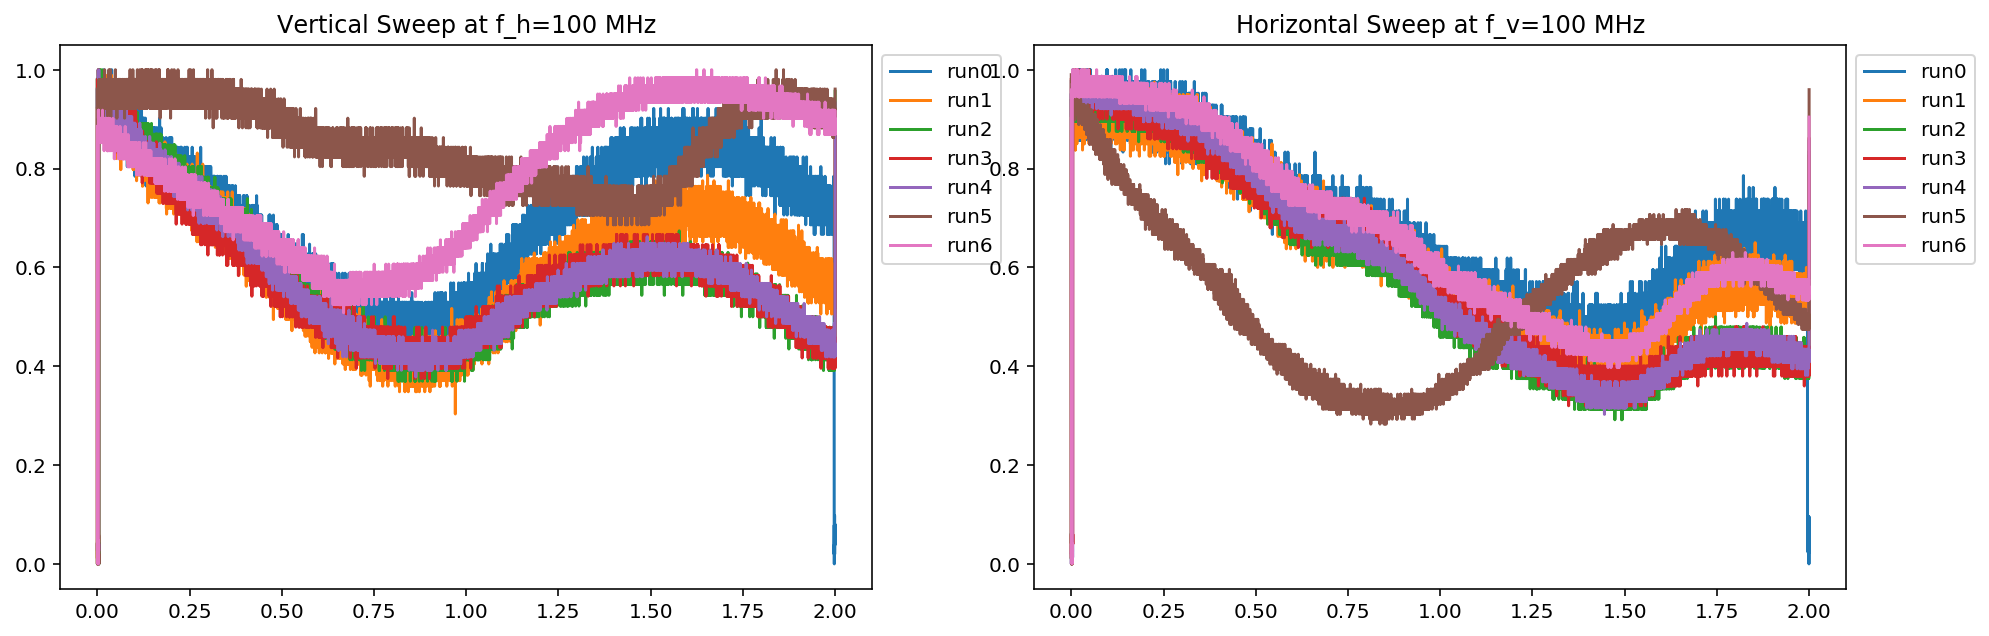

In [42]:
plt.figure(figsize=(16, 5))

plt.subplot(121)
plt.title('Vertical Sweep at f_h=100 MHz')

for i, run in enumerate(runs):
    df = run[(run['mode'] == 'vertical') & (run['frequency'] == 100e6)]

    t = df['time'].values[0]
    U = df['voltage'].values[0]
    U -= U.min()
    U /= U.max()
    
    plt.plot(t, U, label=f'run{i}')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")

plt.subplot(122)
plt.title('Horizontal Sweep at f_v=100 MHz')

for i, run in enumerate(runs):
    df = run[(run['mode'] == 'horizontal') & (run['frequency'] == 100e6)]

    t = df['time'].values[0]
    U = df['voltage'].values[0]
    U -= U.min()
    U /= U.max()
    
    plt.plot(t, U, label=f'run{i}')

plt.legend(bbox_to_anchor=(1,1), loc="upper left")
plt.show()

In the above plots we see that the effect of different setups is most notable in the high frequency regime above the center frequency of 100 MHz. Further we remark that the intensity is highly related to the AOD element.

In [57]:
images = []

for run in runs:
    df = run[run['frequency'] == 100e6]
    
    x = df[df['mode'] == 'vertical']['voltage'].values[0][::10]
    y = df[df['mode'] == 'horizontal']['voltage'].values[0][::10]
    
    images.append(np.outer(x, y))

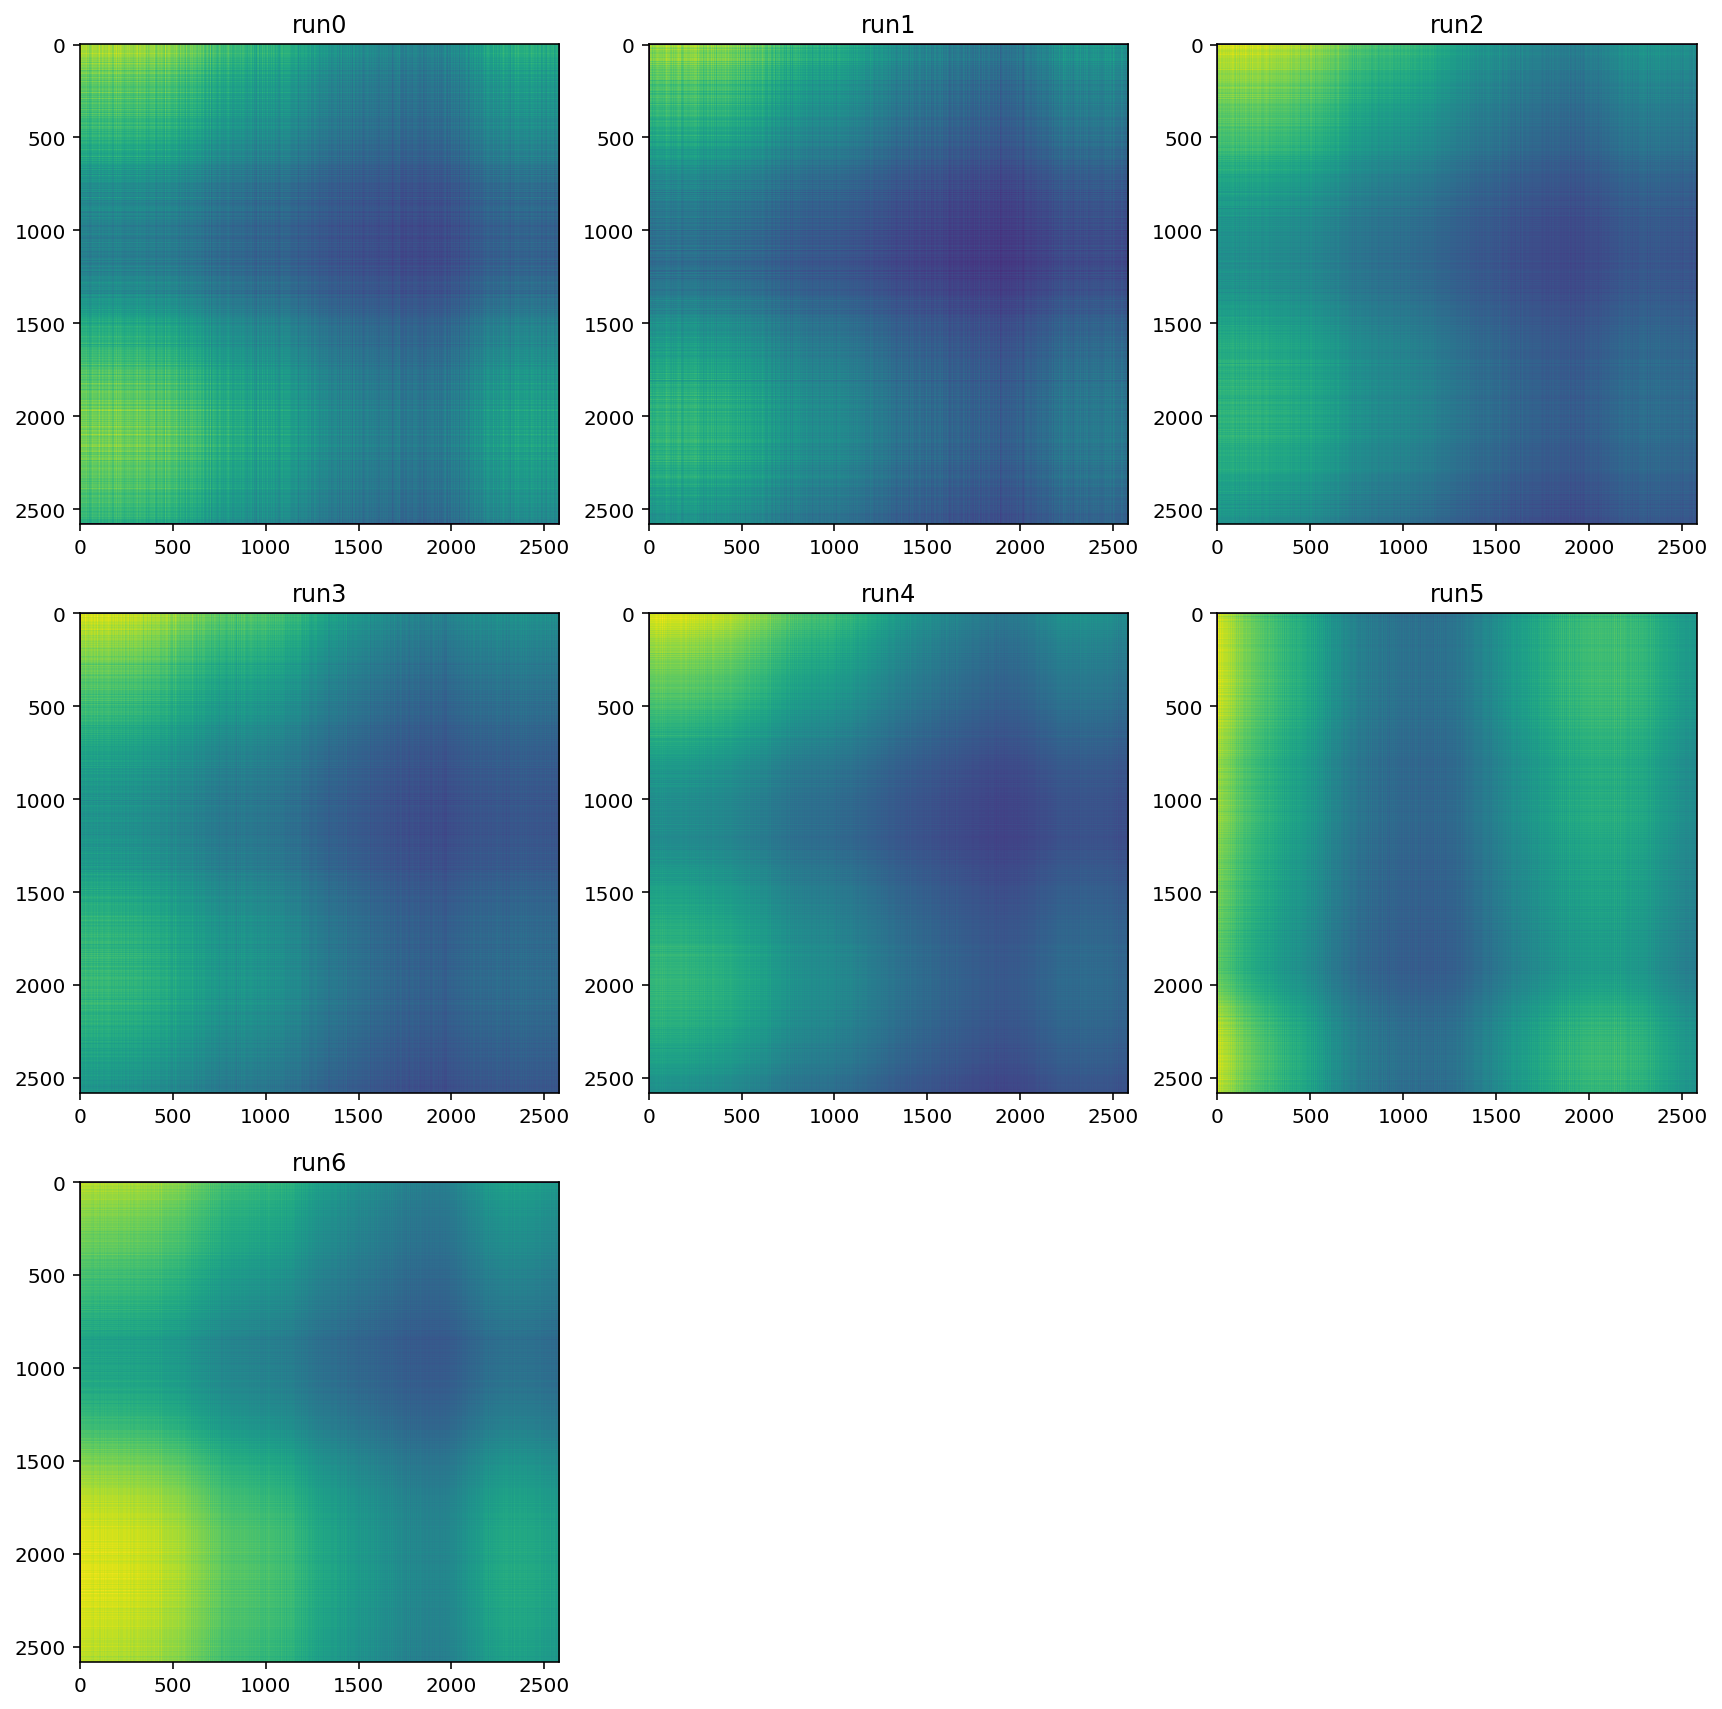

In [61]:
plt.figure(figsize=(12, 12))


for i, img in enumerate(images):
    img -= img.min()
    img /= img.max()

    plt.subplot(331+i)
    plt.title(f'run{i}')
    plt.imshow(img)

plt.tight_layout()
plt.show()

In [4]:
hdata = []
vdata = []

for i, run in enumerate(runs):
    hd, vd = util.scatter(run)

    vmin = min([hd[2].min(), vd[2].min()])
    hd[2] -= vmin
    vd[2] -= vmin
    
    vmax = min([hd[2].max(), vd[2].max()])
    hd[2] /= vmax
    vd[2] /= vmax
    
    hdata.append(hd)
    vdata.append(vd)

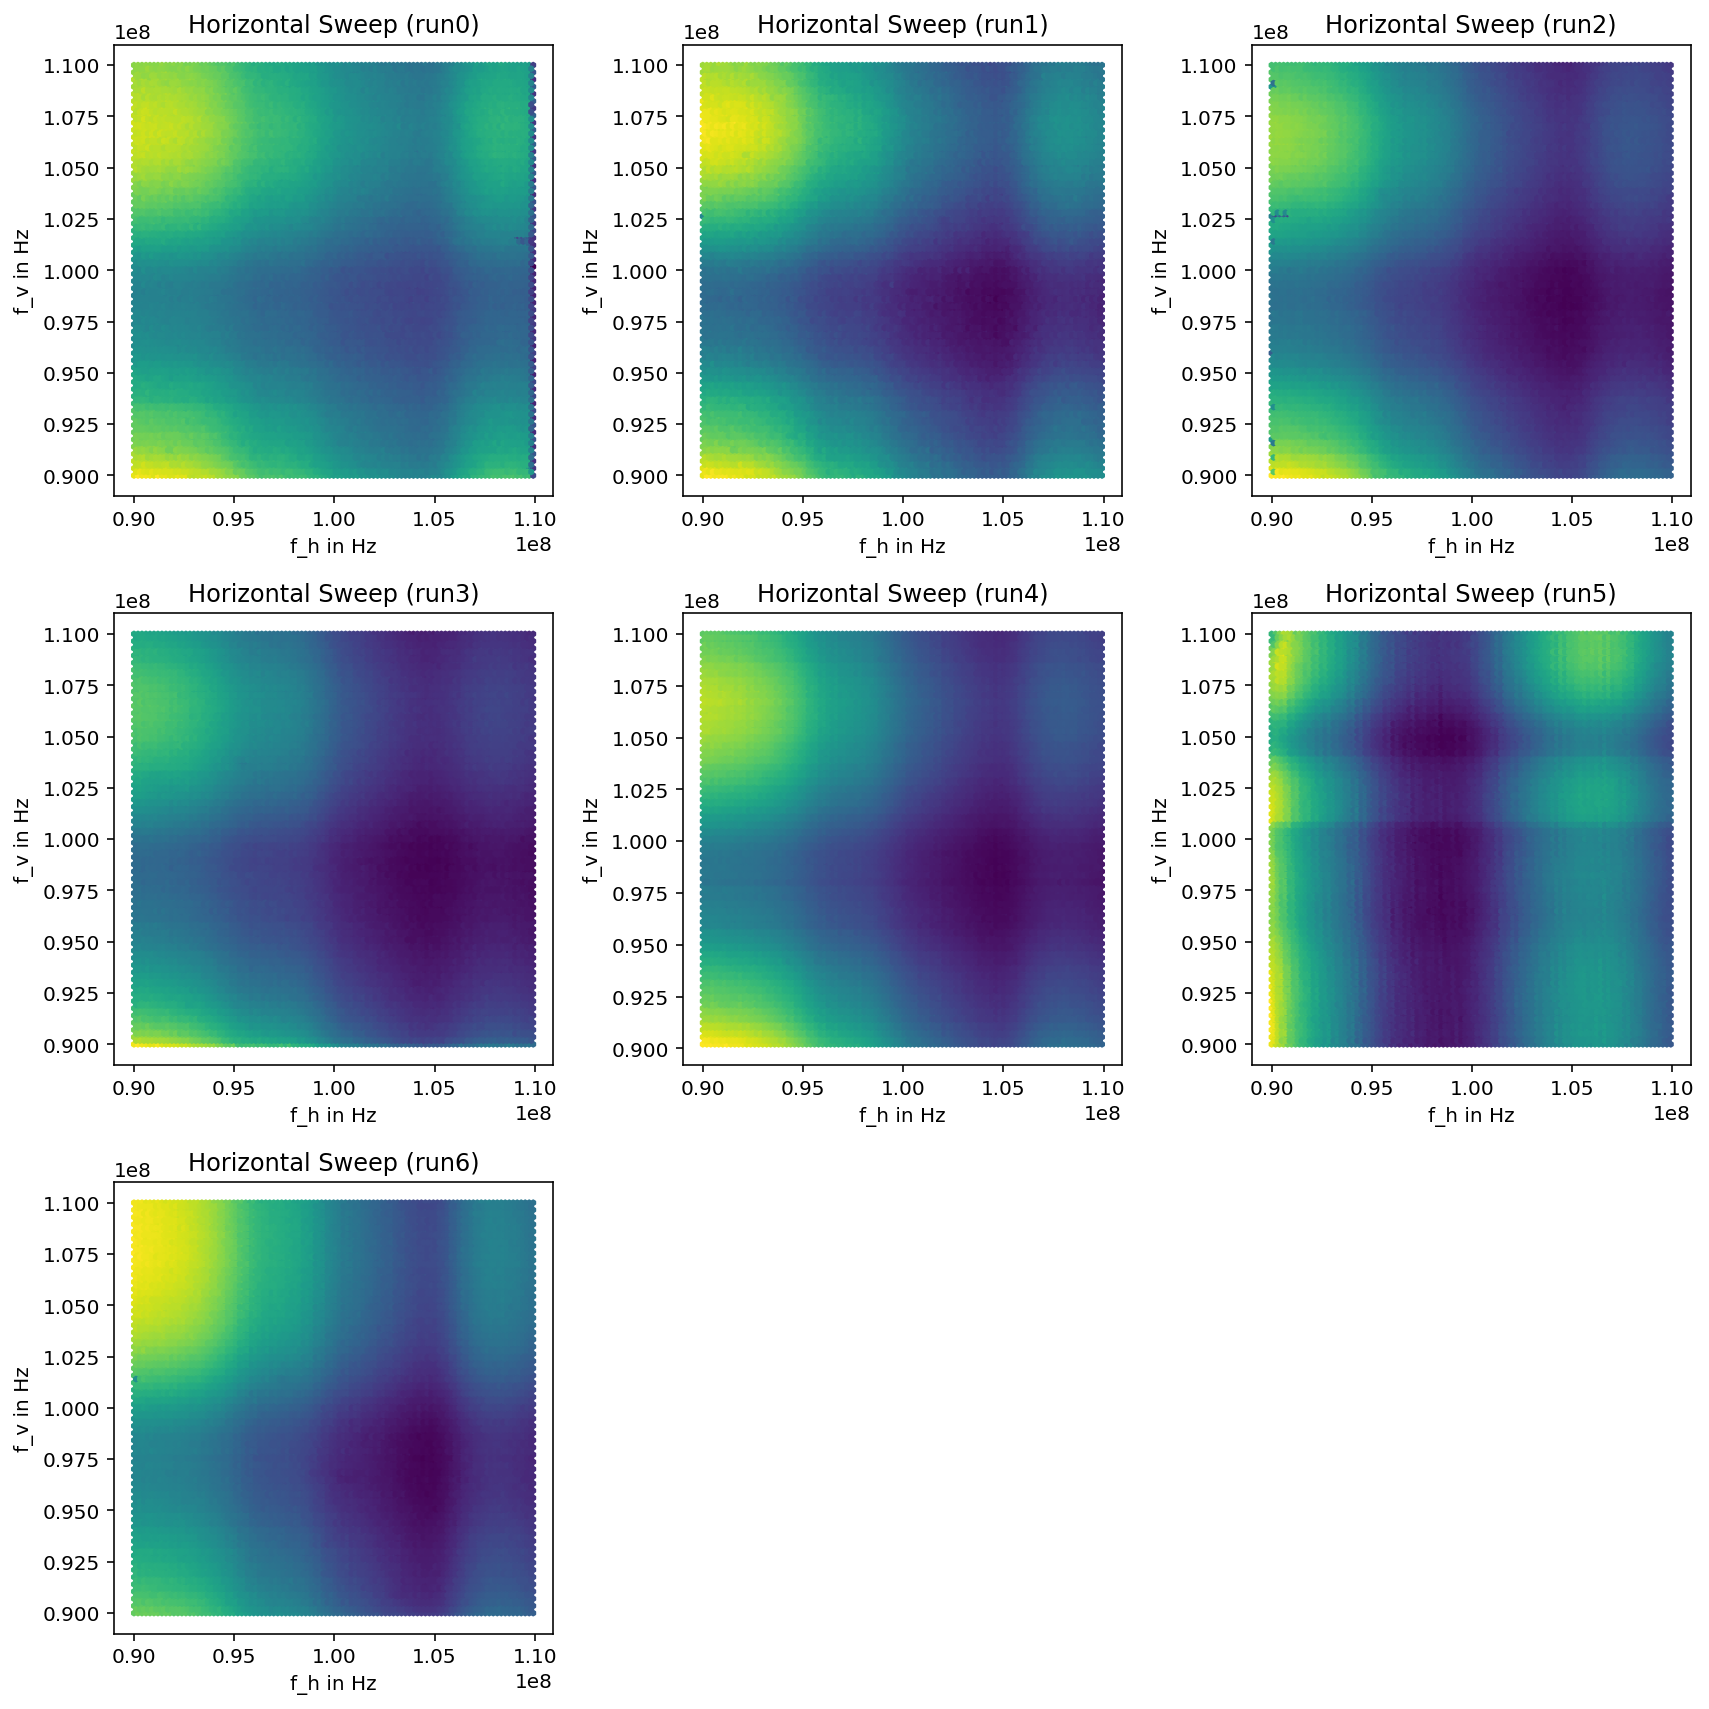

In [5]:
plt.figure(figsize=(12, 12))

for i, hd in enumerate(hdata):
    plt.subplot(331+i)
    plt.title(f'Horizontal Sweep (run{i})')
    plt.xlabel('f_h in Hz')
    plt.ylabel('f_v in Hz')
    plt.hexbin(hd[0], hd[1], C=hd[2])
    
plt.tight_layout()
plt.show()